# Heading

Description

In [7]:
import numpy as np 

n_elems = 1000


u = np.ones(n_elems)
x = np.linspace(1./(2*n_elems), 1.-1./(2*n_elems), n_elems)

mp = 0.2
hw = 0.2
u[np.logical_and(x > mp-hw, x < mp+hw)] += (np.cos(np.pi/hw*(x[np.logical_and(x > mp-hw, x < mp+hw)] - mp)) + 1.) / 2.



<BarContainer object of 1000 artists>

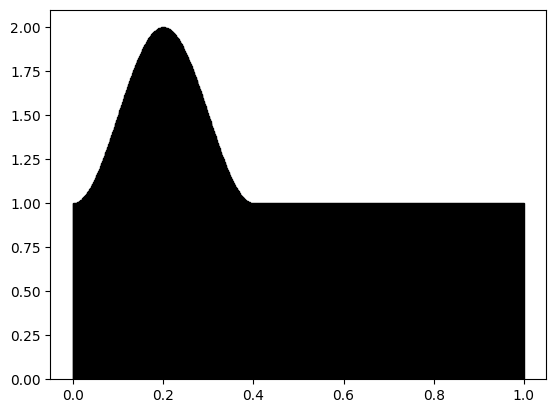

In [8]:
from matplotlib import pyplot as plt

plt.figure()

plt.bar(x, u, width=1/n_elems, edgecolor='black')

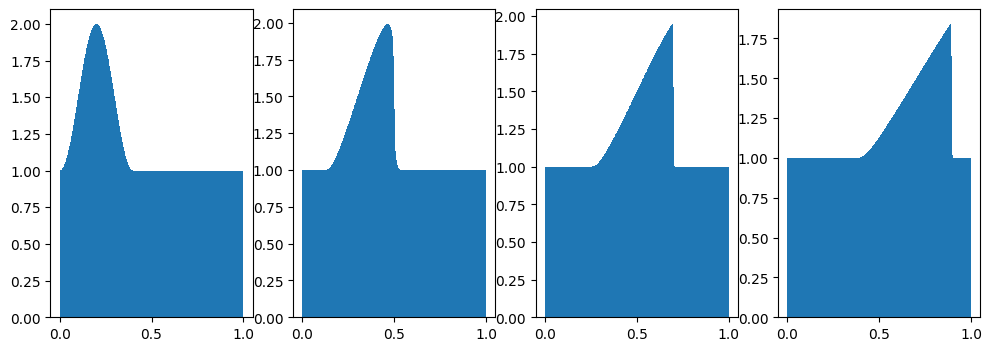

In [9]:
a = 1.5
dt = 0.4/(a*n_elems)
vol = 1/n_elems
u_left = 1.
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(12, 4)
ax[0].bar(x, u, width=1/n_elems)
ifig_prev = 0
for i in range(int(0.7/(a*dt))):
    # linear
    # u[1:] += (a*dt/vol)*u[:-1] - (a*dt/vol)*u[1:]
    # u[0]  += (a*dt/vol)*u_left - (a*dt/vol)*u[0]
    # burgers
    u[1:] += dt/vol*0.5*u[:-1]**2 - dt/vol*0.5*u[1:]**2
    u[0]  += dt/vol*0.5*u_left**2 - dt/vol*0.5*u[0]**2
    ifig = int(i*a*dt/0.2) 
    if ifig > ifig_prev:
        ax[ifig].bar(x, u, width=1/n_elems)
        ifig_prev = ifig